In [2]:
import pandas as pd

train_dtm = pd.read_pickle('input/train_dtm.pkl')
train_tdm = train_dtm.transpose()
train_tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaallll,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaarrrgghhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_dtm.head()

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aampb,aampw,aan,...,ûò,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# going to crank through some simple EDA, then try to come up with more relevant things
# most words might only appear once, tweets are short
# maybe, what words appear most over all of the tweets

most_said = {}
#most_said_df = pd.DataFrame()
#for c in train_tdm.columns:
#    most = train_tdm[c].
#train_dtm['earthquake'].sum()
for c in train_dtm.columns:
    most_said[c] = train_dtm[c].sum()
    #most_said_df[c] = train_dtm[c].sum()

#most_said
#most_said.sort_values(ascending=True)
most_said_df = pd.DataFrame(data=most_said,index=[0])
most_said_df

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aal,aampb,aampw,aan,...,ûò,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,3,1,1,1,1,1,1,1,1,1,...,43,1,1,27,1,1,1,1,1,1


In [24]:
most_said_df_t = most_said_df.transpose()
most_said_df_t = most_said_df_t.sort_values(by=0,ascending=False)
most_said_df_t.head(30)

,0
like,345
just,320
amp,300
im,300
new,226
news,197
people,196
dont,191
video,165
emergency,157


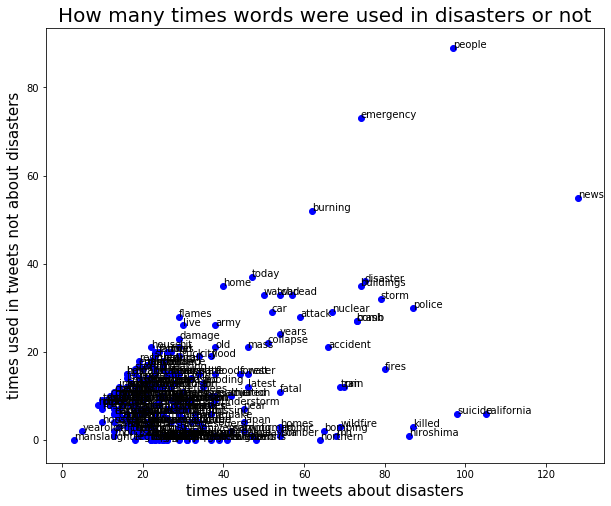

In [86]:
# create a dictionary of disaster words, classify them as disaster word if the tweets the 
# word appears in are more often disaster than not
import numpy as np
#train_df['target'].sum() # about half

#train_dtm.head() # assume tweets are in same order still 

earthquakes = [train_df['target'][pos] for pos in range(0,len(train_df['target'])) 
               if train_dtm['earthquake'][pos]==1]
like = [train_df['target'][pos] for pos in range(0,len(train_df['target'])) 
               if train_dtm['like'][pos]==1]
# so, maybe make two dictionaries to keep track of counts, and get rid of words that don't meet a 
# particular threshhold of disaster/not disaster

disas_word = {}
non_disas_word = {}

most_said_df = most_said_df_t.transpose()

for c in most_said_df.columns:
    # stop running after words stop appearing
    if most_said_df[c][0]<20:
        break
    temp_list = np.array([train_df['target'][pos] for pos in range(0,len(train_df['target']))
                if train_dtm[c][pos]==1])
    #print(c)
    #print(temp_list.sum())
    if temp_list.sum()> (len(temp_list) - temp_list.sum()):
        disas_word[c] = temp_list.sum()
        non_disas_word[c] = len(temp_list) - temp_list.sum()

#print(disas_word)
#print(non_disas_word)
    
#plt.hist(earthquakes)
#plt.show()
#plt.hist(like)
#plt.show()

for keys in disas_word:
    #print(keys,disas_word[keys])
    #print(disas_word[keys])
    x = disas_word[keys]
    y = non_disas_word[keys]
    plt.scatter(x,y, color='blue')
    plt.text(x+0.001, y+0.001, keys, fontsize=10)
    
plt.title('How many times words were used in disasters or not',fontsize=20)
plt.xlabel('times used in tweets about disasters', fontsize=15)
plt.ylabel('times used in tweets not about disasters', fontsize=15)
plt.show()

In [ ]:
# could also try make my own word embedding, and assign each word in the vocabulary a value that indicates some
# ratio of words that appear in a disaster tweet

In [39]:
train_df = pd.read_pickle('input/train_df.pkl')
train_df.head()
print(train_df['text'][0])

our deeds are the reason of this earthquake may allah forgive us all


In [44]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

train_df['polarity'] = train_df['text'].apply(pol)
train_df['subjectivity'] = train_df['text'].apply(sub)
train_df.head()

,id,keyword,location,text,target,polarity,subjectivity
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,0.00000,0.0000
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0.10000,0.4000
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,-0.01875,0.3875
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,0.00000,0.0000
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,0.00000,0.0000


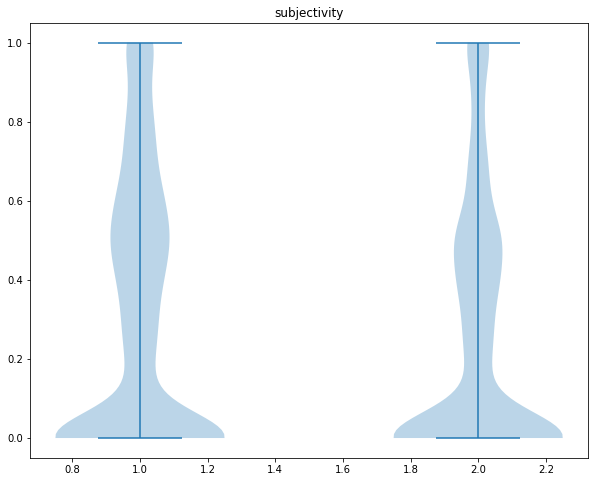

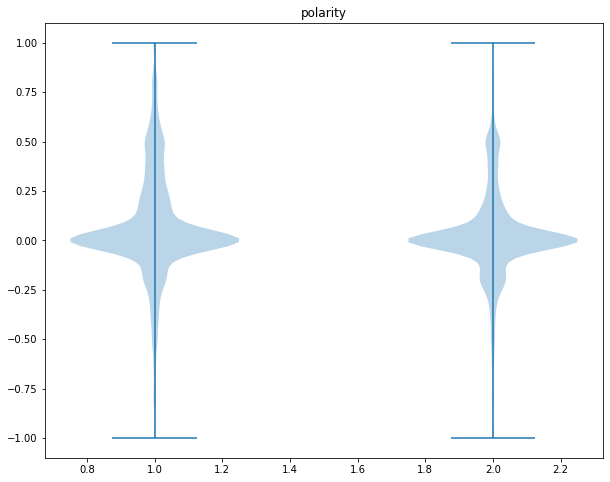

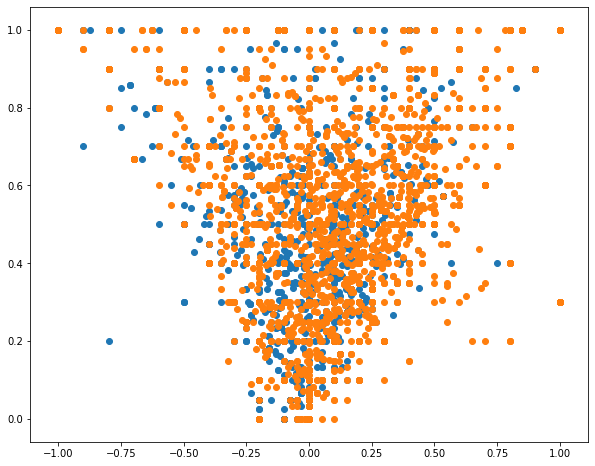

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

sub_dis = [train_df['subjectivity'][row_val] for row_val in range(0,len(train_df['target'])-1)
           if train_df['target'][row_val]==1 ]
sub_nodis = [train_df['subjectivity'][row_val] for row_val in range(0,len(train_df['target'])-1)
           if train_df['target'][row_val]==0 ]
pol_dis = [train_df['polarity'][row_val] for row_val in range(0,len(train_df['target'])-1)
           if train_df['target'][row_val]==1 ]
pol_nodis = [train_df['polarity'][row_val] for row_val in range(0,len(train_df['target'])-1)
           if train_df['target'][row_val]==0 ]

sub_plts = [sub_nodis, sub_dis]
pol_plts = [pol_nodis, pol_dis]

plt.violinplot(sub_plts)
plt.title('subjectivity')
plt.show()
plt.violinplot(pol_plts)
plt.title('polarity')
plt.show()

plt.scatter(pol_dis,sub_dis)
plt.scatter(pol_nodis,sub_nodis)
plt.show()

There doesn't seem to be a significant difference in subjectivity or polarity between disaster or not

Let's try some topic modeling (LDA)

In [52]:
from gensim import matutils, models
import scipy.sparse

In [53]:
train_tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaallll,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaarrrgghhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
sparse_counts = scipy.sparse.csr_matrix(train_tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [58]:
import pickle
cv = pickle.load(open('input/cv.pkl','rb'))
id2word = dict((v,k) for k, v in cv.vocabulary_.items())

In [61]:
# LDA for num_topics = 2
# 2 topics may be the most reasonable, as I'm looking for 
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=40)
lda.print_topics()

[(0,
  '0.005*"im" + 0.005*"just" + 0.005*"like" + 0.004*"dont" + 0.004*"amp" + 0.003*"suicide" + 0.003*"people" + 0.003*"new" + 0.003*"storm" + 0.003*"video"'),
 (1,
  '0.004*"disaster" + 0.003*"like" + 0.003*"amp" + 0.003*"emergency" + 0.002*"news" + 0.002*"train" + 0.002*"burning" + 0.002*"mh" + 0.002*"crash" + 0.002*"buildings"')]

In [62]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=40)
lda.print_topics()

[(0,
  '0.006*"amp" + 0.004*"like" + 0.004*"storm" + 0.004*"just" + 0.004*"im" + 0.004*"video" + 0.003*"suicide" + 0.003*"dont" + 0.003*"wreck" + 0.003*"news"'),
 (1,
  '0.005*"emergency" + 0.004*"crash" + 0.004*"families" + 0.003*"mh" + 0.003*"police" + 0.002*"man" + 0.002*"fatal" + 0.002*"legionnaires" + 0.002*"malaysia" + 0.002*"time"'),
 (2,
  '0.005*"like" + 0.005*"disaster" + 0.004*"just" + 0.004*"im" + 0.004*"bomb" + 0.004*"nuclear" + 0.003*"fires" + 0.003*"people" + 0.003*"california" + 0.003*"new"')]

In [63]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=40)
lda.print_topics()

[(0,
  '0.005*"amp" + 0.005*"emergency" + 0.004*"wreck" + 0.004*"disaster" + 0.003*"body" + 0.003*"water" + 0.003*"like" + 0.003*"im" + 0.003*"oil" + 0.003*"news"'),
 (1,
  '0.007*"suicide" + 0.005*"pm" + 0.004*"families" + 0.004*"bomber" + 0.004*"bomb" + 0.004*"mh" + 0.004*"hiroshima" + 0.004*"news" + 0.004*"fires" + 0.003*"crash"'),
 (2,
  '0.006*"im" + 0.005*"dont" + 0.005*"just" + 0.004*"new" + 0.004*"video" + 0.004*"amp" + 0.004*"like" + 0.003*"youtube" + 0.003*"thunder" + 0.003*"think"'),
 (3,
  '0.007*"like" + 0.005*"just" + 0.004*"storm" + 0.004*"im" + 0.004*"people" + 0.004*"disaster" + 0.003*"time" + 0.003*"obama" + 0.003*"northern" + 0.003*"say"')]

In [64]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=40)
lda.print_topics()

[(0,
  '0.010*"suicide" + 0.005*"bomber" + 0.005*"bombing" + 0.004*"storm" + 0.004*"bomb" + 0.004*"thunderstorm" + 0.004*"pm" + 0.003*"trapped" + 0.003*"severe" + 0.003*"old"'),
 (1,
  '0.015*"like" + 0.011*"im" + 0.007*"just" + 0.005*"amp" + 0.005*"dont" + 0.004*"got" + 0.004*"video" + 0.004*"water" + 0.003*"weapon" + 0.003*"time"'),
 (2,
  '0.006*"fires" + 0.004*"im" + 0.004*"people" + 0.004*"forest" + 0.003*"wreck" + 0.003*"legionnaires" + 0.003*"new" + 0.003*"wild" + 0.003*"families" + 0.003*"content"'),
 (3,
  '0.006*"disaster" + 0.006*"crash" + 0.005*"amp" + 0.004*"obama" + 0.004*"killed" + 0.004*"news" + 0.004*"california" + 0.004*"wounded" + 0.004*"northern" + 0.004*"sinking"'),
 (4,
  '0.006*"just" + 0.005*"mh" + 0.004*"news" + 0.004*"thunder" + 0.003*"fatal" + 0.003*"malaysia" + 0.003*"confirmed" + 0.003*"wreckage" + 0.003*"homes" + 0.003*"pm"')]